In [55]:
import nltk
import gensim
from gensim.models.doc2vec import Doc2Vec



docs=Doc2Vec.load("doc2vec.bin")
newdoc=[]
for doc in docs.docvecs:
   newdoc.append(doc) 

print(len(newdoc))

3585


In [46]:
import sys
import codecs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.manifold import TSNE

titles=list(docs.docvecs.doctags.keys())

In [56]:
a_titles=[]
a_doc=[]
i=0
for title in titles:
    if "regenerative" in title:
        a_titles.append(title)
        a_doc.append(newdoc[i])
    i=i+1
print(a_titles)

['Liver regenerative medicine: Advances and challenges', 'From micro-ct to multiscale mechanics of double-porous hydroxyapatite granules for regenerative medicine', 'Micro CT-based multiscale elasticity of double-porous (pre-cracked) hydroxyapatite granules for regenerative medicine', 'Composite materials based on chitosan and montmorillonite: Prospects for use as a matrix for cultivation of stem and regenerative cells', 'Features of ethical expertise in planning and conducting clinical research in regenerative medicine', 'Composite materials based on chitosan and montmorillonite: Prospects for use as a matrix for stem and regenerative cell cultivation', 'Modern strategies of regenerative therapy and safety of allogenous human umbilical cord blood stem cells administration for neurodegenerative diseases', 'Ultrastructure and stereology of cardiomyocytes in the development of regenerative and plastic myocardial insufficiency during ontogeny', 'Non-viral gene therapy approach for regener

In [38]:
first_elements=20
newdoc=newdoc[10:first_elements]
titles=titles[10:first_elements]

In [57]:

tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(a_doc)

Y=Y*100

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


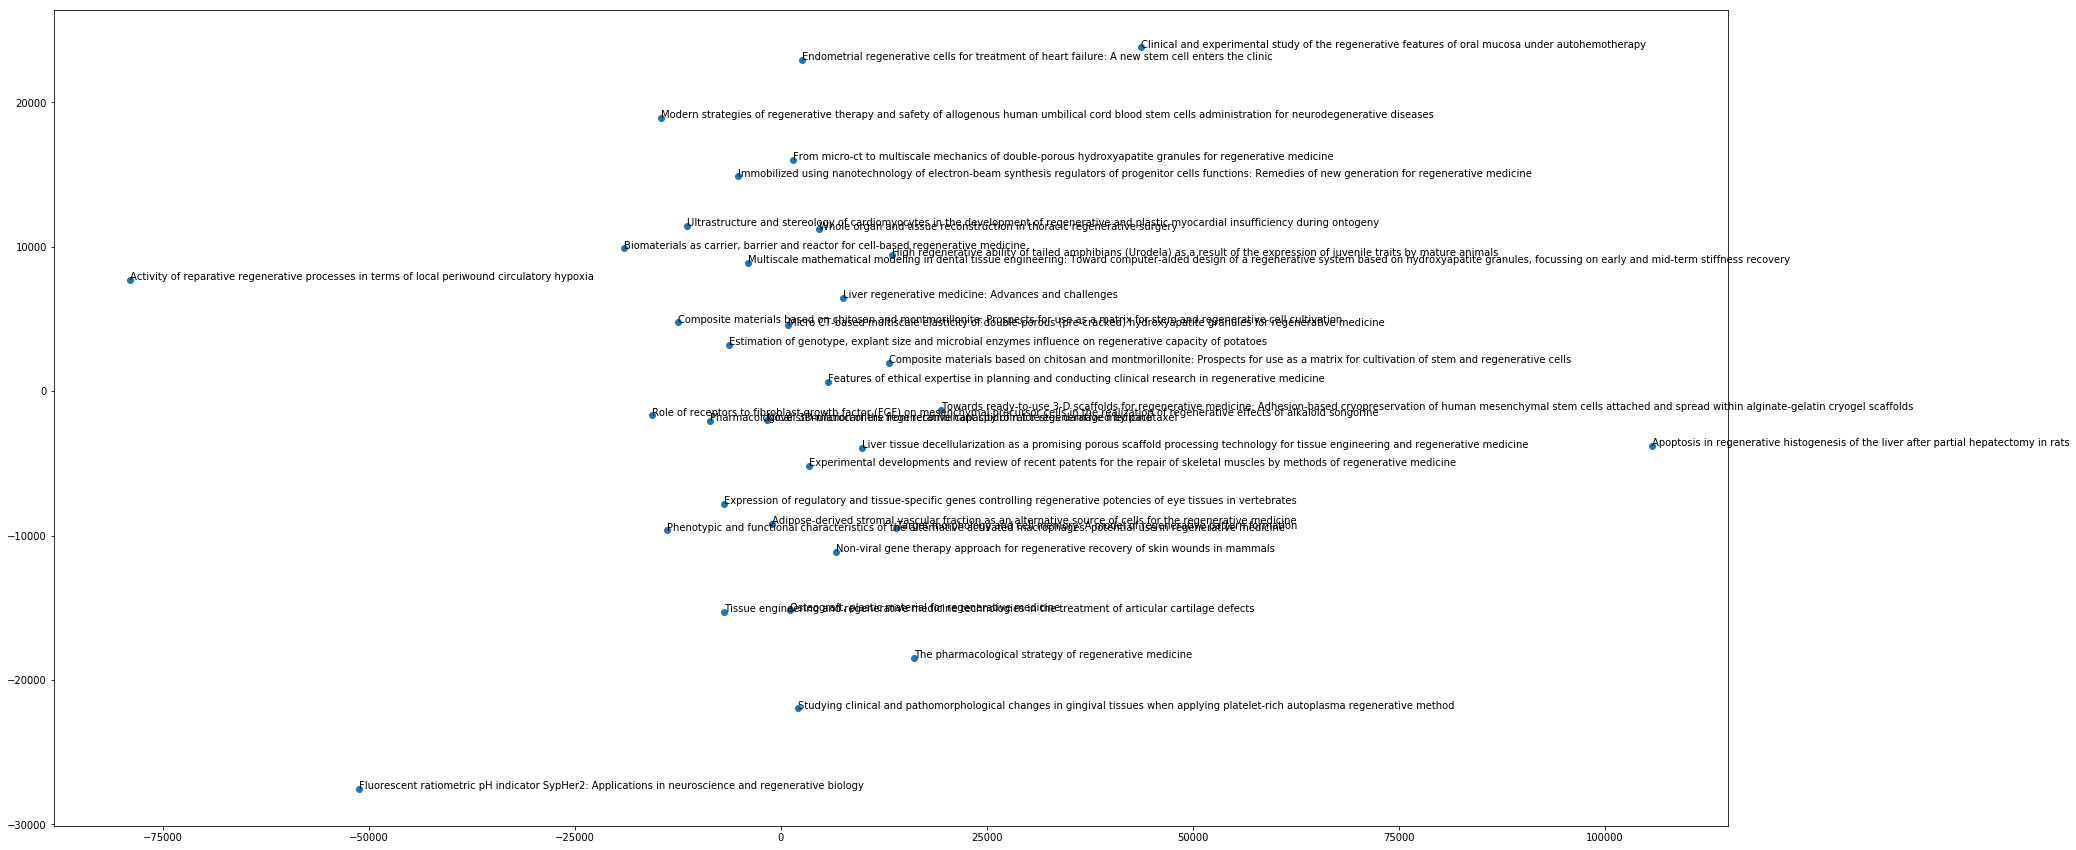

In [58]:
%pylab inline
pylab.rcParams['figure.figsize'] = (30,15)
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(a_titles, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()
